# Predicting Poverty
In this notebook, we will explore various machine learning models to predict poverty. We will use Poverty data provided by the DrivenData competition **Pover-T Tests**. The models we will implement and compare are:
- Random Forest
- K-Nearest Neighbors
- Decision Tree
- Logistic Regression

We will then compare our models to each country's data using the **accuracy scores** of the models.

## Set up
Import libraries and helper functions that are used in this notebook.

In [1]:
%matplotlib inline
%run 'helper_functions.ipynb'

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

## Data Prep
Retrieve **features** and **outcomes** (for training data) for both train and test data, each with Countries A, B, and C. We appropriately include individual data into the household data by:
- Taking the mean of individual numerical data
- Taking the mode of individual categorical data
- Grouping by household id and joining into the household dataset

In [2]:
data = make_model_xy()

Input shape:	(8203, 344)
After standardization (8203, 344)
After converting categoricals:	(8203, 859)
Input shape:	(8203, 42)
After standardization (8203, 41)
After converting categoricals:	(8203, 254)
Input shape:	(3255, 441)
After standardization (3255, 441)
After converting categoricals:	(3255, 1432)
Input shape:	(3255, 225)
After standardization (3255, 224)
After converting categoricals:	(3255, 1161)
Input shape:	(6469, 163)
After standardization (6469, 163)
After converting categoricals:	(6469, 795)
Input shape:	(6469, 42)
After standardization (6469, 41)
After converting categoricals:	(6469, 290)
Input shape:	(4041, 344)
After standardization (4041, 344)
After converting categoricals:	(4041, 851)
Input shape:	(4041, 42)
After standardization (4041, 41)
After converting categoricals:	(4041, 237)
Input shape:	(1604, 441)
After standardization (1604, 441)
After converting categoricals:	(1604, 1419)
Input shape:	(1604, 225)
After standardization (1604, 224)
After converting categoric

## Model #1: Random Forest
We will now instantiate, train and perform predictions using a Random Forest model. Validation is also performed to assess our model accuracy. All models are instantiated and trained using the helper functions imported, such as `train_model` as seen below.

### Grow Trees with Imported Model

In [3]:
model_a = train_model(data['ax'], data['ay'])
rf_acc_a = model_a.score(data['ax'], data['ay'])
print(f"In-sample accuracy: {rf_acc_a:0.2%}")

In-sample accuracy: 100.00%


In [4]:
model_b = train_model(data['bx'], data['by'])
rf_acc_b = model_b.score(data['bx'], data['by'])
print(f"In-sample accuracy: {rf_acc_b:0.2%}")

In-sample accuracy: 99.94%


In [5]:
model_c = train_model(data['cx'], data['cy'])
rf_acc_c = model_c.score(data['cx'], data['cy'])
print(f"In-sample accuracy: {rf_acc_c:0.2%}")

In-sample accuracy: 99.92%


### Cross-Validation

Country A

In [6]:
cross_val_score(RandomForestClassifier(50), data['ax'], data['ay'], cv=KFold(n_splits=10, shuffle=True, random_state=11))

array([0.5091352 , 0.57612667, 0.50548112, 0.51707317, 0.48780488,
       0.52804878, 0.51219512, 0.52560976, 0.52317073, 0.51341463])

Country B

In [7]:
cross_val_score(RandomForestClassifier(50), data['bx'], data['by'], cv=KFold(n_splits=10, shuffle=True, random_state=11))

array([0.91717791, 0.94478528, 0.95092025, 0.92944785, 0.92638037,
       0.90769231, 0.92      , 0.93230769, 0.89230769, 0.90769231])

Country C

In [8]:
cross_val_score(RandomForestClassifier(50), data['cx'], data['cy'], cv=KFold(n_splits=10, shuffle=True, random_state=11))

array([0.84544049, 0.82689335, 0.84544049, 0.8763524 , 0.8438949 ,
       0.82071097, 0.86244204, 0.84698609, 0.85935085, 0.86842105])

### Grid Search

In [9]:
param_grid = {'n_estimators': np.arange(45, 50)}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)

In [10]:
# Fit the grid search to your training data
grid_search.fit(data['ax'], data['ay'])
grid_search.fit(data['bx'], data['by'])
grid_search.fit(data['cx'], data['cy'])

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

### Predict Using the Model

In [11]:
a_preds = model_a.predict_proba(data['at'])
b_preds = model_b.predict_proba(data['bt'])
c_preds = model_c.predict_proba(data['ct'])

In [12]:
# convert preds to data frames
a_sub = make_country_sub(a_preds, data['at'], 'A')
b_sub = make_country_sub(b_preds, data['bt'], 'B')
c_sub = make_country_sub(c_preds, data['ct'], 'C')

In [13]:
submission = pd.concat([a_sub, b_sub, c_sub])

### Write and Format Data
Work is done to format the data correctly so that the IDs aren't ordered for submission. The very first (unnamed) column contains indexes before sorting and will need to be removed manually.

In [14]:
submission.to_csv('submission1.csv')
format_sub('./submission1.csv')

## Model #2: K-Nearest Neighbors
We will now perform predictions using a K-Nearest Neighbors model. Changing the number of neighbors (i.e. increasing) will affect the accuracy of the model. This demonstration will use `n_neighbors=20`

### Train Imported Model

In [15]:
# Fit the model to our (training) data
# Assess the accuracy of the model
knn_model_a = knn_train_model(data['ax'], data['ay'])
knn_acc_a = knn_model_a.score(data['ax'], data['ay'])
print(f"In-sample accuracy: {knn_acc_a:0.2%}")

In-sample accuracy: 58.55%


In [16]:
knn_model_b = knn_train_model(data['bx'], data['by'])
knn_acc_b = knn_model_b.score(data['bx'], data['by'])
print(f"In-sample accuracy: {knn_acc_b:0.2%}")

In-sample accuracy: 92.29%


In [17]:
knn_model_c = knn_train_model(data['cx'], data['cy'])
knn_acc_c = knn_model_c.score(data['cx'], data['cy'])
print(f"In-sample accuracy: {knn_acc_c:0.2%}")

In-sample accuracy: 84.96%


### Cross-Validation

Country A

In [18]:
cross_val_score(KNeighborsClassifier(20), data['ax'], data['ay'], cv=KFold(n_splits=10, shuffle=True, random_state=11))

array([0.52131547, 0.54323995, 0.51522533, 0.50121951, 0.52804878,
       0.52073171, 0.50731707, 0.51463415, 0.54146341, 0.52317073])

Country B

In [19]:
cross_val_score(KNeighborsClassifier(20), data['bx'], data['by'], cv=KFold(n_splits=10, shuffle=True, random_state=11))

array([0.91717791, 0.94478528, 0.95092025, 0.92944785, 0.92638037,
       0.90769231, 0.92      , 0.93230769, 0.89230769, 0.90769231])

Country C

In [20]:
cross_val_score(KNeighborsClassifier(20), data['cx'], data['cy'], cv=KFold(n_splits=10, shuffle=True, random_state=11))

array([0.84544049, 0.82689335, 0.84544049, 0.8763524 , 0.8438949 ,
       0.82071097, 0.86244204, 0.84698609, 0.85935085, 0.86842105])

### Grid Search

In [21]:
param_grid = {'n_neighbors': np.arange(15, 20)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)

In [22]:
# Fit the grid search to your training data
grid_search.fit(data['ax'], data['ay'])
grid_search.fit(data['bx'], data['by'])
grid_search.fit(data['cx'], data['cy'])

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([15, 16, 17, 18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

### Predict Using the Model

In [23]:
# Use fitted model to predict testing data
knn_preds_a = knn_model_a.predict_proba(data['at'])
knn_preds_b = knn_model_b.predict_proba(data['bt'])
knn_preds_c = knn_model_c.predict_proba(data['ct'])

In [24]:
# convert preds to data frames
knn_sub_a = make_country_sub(knn_preds_a, data['at'], 'A')
knn_sub_b = make_country_sub(knn_preds_b, data['bt'], 'B')
knn_sub_c = make_country_sub(knn_preds_c, data['ct'], 'C')

In [25]:
submission_knn = pd.concat([knn_sub_a, knn_sub_b, knn_sub_c])

### Write and Format Data
This is done just like above.

In [26]:
submission_knn.to_csv('submission2.csv')
format_sub('./submission2.csv')

## Model #3: Decision Tree
Next, we will perform the same procedure using a Decision Tree. Please note that discussion on the accuracy scores of this model is done at the end for our conclusion and future steps.

### Train Imported Model

In [27]:
# Fit the model to our (training) data
# Assess the accuracy of the model
dt_model_a = dt_train_model(data['ax'], data['ay'])
dt_acc_a = dt_model_a.score(data['ax'], data['ay'])
print(f"In-sample accuracy: {dt_acc_a:0.2%}")

In-sample accuracy: 100.00%


In [28]:
# Fit the model to our (training) data
# Assess the accuracy of the model
dt_model_b = dt_train_model(data['bx'], data['by'])
dt_acc_b = dt_model_b.score(data['bx'], data['by'])
print(f"In-sample accuracy: {dt_acc_b:0.2%}")

In-sample accuracy: 100.00%


In [29]:
# Fit the model to our (training) data
# Assess the accuracy of the model
dt_model_c = dt_train_model(data['cx'], data['cy'])
dt_acc_c = dt_model_c.score(data['cx'], data['cy'])
print(f"In-sample accuracy: {dt_acc_c:0.2%}")

In-sample accuracy: 100.00%


### Cross-Validaton

Country A

In [30]:
cross_val_score(DecisionTreeClassifier(), data['ax'], data['ay'], cv=KFold(n_splits=10, shuffle=True, random_state=11))

array([0.51035323, 0.49451888, 0.53593179, 0.48292683, 0.53292683,
       0.50731707, 0.48170732, 0.53170732, 0.47317073, 0.50487805])

Country B

In [31]:
cross_val_score(DecisionTreeClassifier(), data['bx'], data['by'], cv=KFold(n_splits=10, shuffle=True, random_state=11))

array([0.84969325, 0.85276074, 0.84355828, 0.82822086, 0.8803681 ,
       0.80615385, 0.86153846, 0.85846154, 0.82153846, 0.81538462])

Country C

In [32]:
cross_val_score(DecisionTreeClassifier(), data['bx'], data['by'], cv=KFold(n_splits=10, shuffle=True, random_state=11))

array([0.85582822, 0.84969325, 0.83742331, 0.84355828, 0.88957055,
       0.82769231, 0.84923077, 0.84307692, 0.82461538, 0.82769231])

### Grid Search
This is not performed because there are no parameters (other than random state) used in the Decision Tree.

### Predict Using the Model

In [33]:
# Use fitted model to predict testing data
dt_preds_a = dt_model_a.predict_proba(data['at'])
dt_preds_b = dt_model_b.predict_proba(data['bt'])
dt_preds_c = dt_model_c.predict_proba(data['ct'])

In [34]:
# convert preds to data frames
dt_sub_a = make_country_sub(dt_preds_a, data['at'], 'A')
dt_sub_b = make_country_sub(dt_preds_b, data['bt'], 'B')
dt_sub_c = make_country_sub(dt_preds_c, data['ct'], 'C')

In [35]:
submission_dt = pd.concat([dt_sub_a, dt_sub_b, dt_sub_c])

### Write and Format Data

In [36]:
submission_dt.to_csv('submission3.csv')
format_sub('./submission3.csv')

## Model #4: Logistic Regression
Finally, we will do this procedure one last time for Logistic Regression.

### Train Imported Model

In [37]:
# Fit the model to our (training) data
# Assess the accuracy of the model
lr_model_a = lr_train_model(data['ax'], data['ay'])
lr_acc_a = lr_model_a.score(data['ax'], data['ay'])
print(f"In-sample accuracy: {lr_acc_a:0.2%}")

In-sample accuracy: 61.67%


/Users/yasmine/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [38]:
lr_model_b = lr_train_model(data['bx'], data['by'])
lr_acc_b = lr_model_b.score(data['bx'], data['by'])
print(f"In-sample accuracy: {lr_acc_b:0.2%}")

In-sample accuracy: 97.14%


/Users/yasmine/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
lr_model_c = lr_train_model(data['cx'], data['cy'])
lr_acc_c = lr_model_c.score(data['cx'], data['cy'])
print(f"In-sample accuracy: {lr_acc_c:0.2%}")

In-sample accuracy: 85.55%


/Users/yasmine/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Cross-Validation

Country A

In [40]:
cross_val_score(LogisticRegression(), data['ax'], data['ay'], cv=KFold(n_splits=10, shuffle=True, random_state=11))

/Users/yasmine/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/yasmine/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

array([0.51766139, 0.53105968, 0.53105968, 0.53414634, 0.50365854,
       0.50853659, 0.49756098, 0.52195122, 0.55243902, 0.50121951])

Country B

In [41]:
cross_val_score(LogisticRegression(), data['bx'], data['by'], cv=KFold(n_splits=10, shuffle=True, random_state=11))

/Users/yasmine/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/yasmine/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

array([0.85276074, 0.89570552, 0.87116564, 0.88650307, 0.89263804,
       0.83076923, 0.88307692, 0.88923077, 0.84923077, 0.83076923])

Country C

In [42]:
cross_val_score(LogisticRegression(), data['cx'], data['cy'], cv=KFold(n_splits=10, shuffle=True, random_state=11))

/Users/yasmine/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/yasmine/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

array([0.82998454, 0.80525502, 0.83153014, 0.84853168, 0.82689335,
       0.80061824, 0.84080371, 0.82998454, 0.82998454, 0.8498452 ])

### Grid Search
This is not performed because there are no parameters used in the Logistic Regression.

### Predict Using the Model

In [43]:
lr_preds_a = lr_model_a.predict_proba(data['at'])
lr_preds_b = lr_model_b.predict_proba(data['bt'])
lr_preds_c = lr_model_c.predict_proba(data['ct'])

In [44]:
# convert preds to data frames
lr_sub_a = make_country_sub(lr_preds_a, data['at'], 'A')
lr_sub_b = make_country_sub(lr_preds_b, data['bt'], 'B')
lr_sub_c = make_country_sub(lr_preds_c, data['ct'], 'C')

In [45]:
submission_lr = pd.concat([lr_sub_a, lr_sub_b, lr_sub_c])

### Write and Format Data

In [46]:
submission_lr.to_csv('submission4.csv')
format_sub('./submission4.csv')

## Model #5: Naive Bayes

### Train Imported Model

In [47]:
# Fit the model to our (training) data
# Assess the accuracy of the model
nb_model_a = nb_train_model(data['ax'], data['ay'])
nb_acc_a = nb_model_a.score(data['ax'], data['ay'])
print(f"In-sample accuracy: {nb_acc_a:0.2%}")

In-sample accuracy: 48.65%


In [48]:
nb_model_b = nb_train_model(data['bx'], data['by'])
nb_acc_b = nb_model_b.score(data['bx'], data['by'])
print(f"In-sample accuracy: {nb_acc_b:0.2%}")

In-sample accuracy: 48.26%


In [49]:
nb_model_c = nb_train_model(data['cx'], data['cy'])
nb_acc_c = nb_model_c.score(data['cx'], data['cy'])
print(f"In-sample accuracy: {nb_acc_c:0.2%}")

In-sample accuracy: 21.24%


### Cross Validation

#### Country A

In [50]:
cross_val_score(GaussianNB(), data['ax'], data['ay'], cv=KFold(n_splits=10, shuffle=True, random_state=11))

array([0.44579781, 0.45188794, 0.43605359, 0.43414634, 0.45487805,
       0.47682927, 0.43902439, 0.45487805, 0.44512195, 0.48536585])

#### Country B

In [51]:
cross_val_score(GaussianNB(), data['bx'], data['by'], cv=KFold(n_splits=10, shuffle=True, random_state=11))

array([0.5       , 0.48773006, 0.4601227 , 0.49079755, 0.44478528,
       0.48      , 0.51692308, 0.48615385, 0.44923077, 0.41846154])

#### Country C

In [52]:
cross_val_score(GaussianNB(), data['cx'], data['cy'], cv=KFold(n_splits=10, shuffle=True, random_state=11))

array([0.21174652, 0.23338485, 0.21638331, 0.17001546, 0.1885626 ,
       0.23338485, 0.17465224, 0.2194745 , 0.19010819, 0.19504644])

### Grid Search
This is not performed because there are no parameters used in the SVM.

### Predict Using the Model

In [53]:
nb_preds_a = nb_model_a.predict_proba(data['at'])
nb_preds_b = nb_model_b.predict_proba(data['bt'])
nb_preds_c = nb_model_c.predict_proba(data['ct'])

In [54]:
# convert preds to data frames
nb_sub_a = make_country_sub(nb_preds_a, data['at'], 'A')
nb_sub_b = make_country_sub(nb_preds_b, data['bt'], 'B')
nb_sub_c = make_country_sub(nb_preds_c, data['ct'], 'C')

In [55]:
submission_nb = pd.concat([nb_sub_a, nb_sub_b, nb_sub_c])

### Write and Format Data

In [56]:
submission_nb.to_csv('submission5.csv')
format_sub('./submission5.csv')

## Analyzing Each Model
Because all 3 countries may have gathered different types of data, a different model may be the best fit for each country. Below, we will analyze the accuracy scores for each model on each country.

### Data Prep for Analysis
Create data frames for accuracy scores for all models per country:

In [57]:
a = {'Random Forest': [rf_acc_a], 'K Nearest Neighbors': [knn_acc_a], 'Decision Tree': [dt_acc_a], 'Logistic Regression': [lr_acc_a], 'Naive Bayes': [nb_acc_a]}
a_df = pd.DataFrame(data=a)

In [58]:
b = {'Random Forest': [rf_acc_b], 'K Nearest Neighbors': [knn_acc_b], 'Decision Tree': [dt_acc_b], 'Logistic Regression': [lr_acc_b], 'Naive Bayes': [nb_acc_b]}
b_df = pd.DataFrame(data=b)

In [59]:
c = {'Random Forest': [rf_acc_c], 'K Nearest Neighbors': [knn_acc_c], 'Decision Tree': [dt_acc_c], 'Logistic Regression': [lr_acc_c], 'Naive Bayes': [nb_acc_c]}
c_df = pd.DataFrame(data=c)

### Country A

In [60]:
a_df

,Random Forest,K Nearest Neighbors,Decision Tree,Logistic Regression,Naive Bayes
0,1.0,0.585517,1.0,0.616726,0.486529


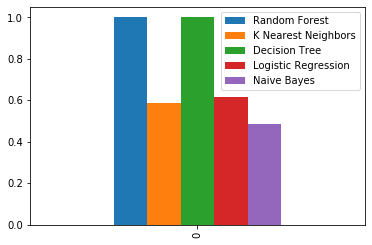

In [61]:
a_df.plot.bar();

### Country B

In [62]:
b_df

,Random Forest,K Nearest Neighbors,Decision Tree,Logistic Regression,Naive Bayes
0,0.999386,0.922888,1.0,0.971429,0.482642


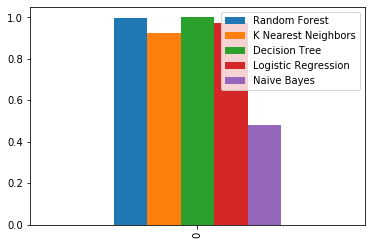

In [63]:
b_df.plot.bar();

### Country C

In [64]:
c_df

,Random Forest,K Nearest Neighbors,Decision Tree,Logistic Regression,Naive Bayes
0,0.999227,0.84959,1.0,0.855465,0.212398


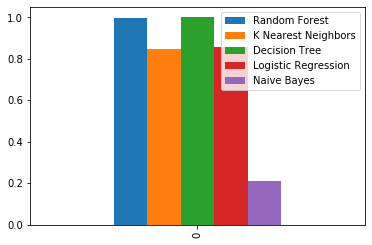

In [65]:
c_df.plot.bar();

### Model Conclusion and Future Steps
From the visualizations seen above, we can conclude that Random Forest is the model with the highest accuracy for all three countries. We see Decision Tree showing 100% accuracy for all three countries, however, our validation proves otherwise. We can see through cross validation that Country A should lie at ~50%, Country B at ~85%, and Country C at ~85%. This would therefore put it more on the level of K Nearest Neighbors, which is the model that is shown to have one of the least accuracy in the models. In the future, we will need to adjust the model fitting of the Decision Tree to make sure accuracy scores are correct and correspond to its validation.